# Exploratory Data Analysis

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the training dataset on which performing EDA
train_set = pd.read_csv("/Users/fede.dicerbo/Desktop/practical2/train.csv", header=0)

In [3]:
train_set.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [4]:
len(train_set)

300000

### EDA for continuous variables

In [5]:
#Selecting the relevant columns
X_train_cont= train_set[train_set.columns[20:31]]
X_train_cont.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960


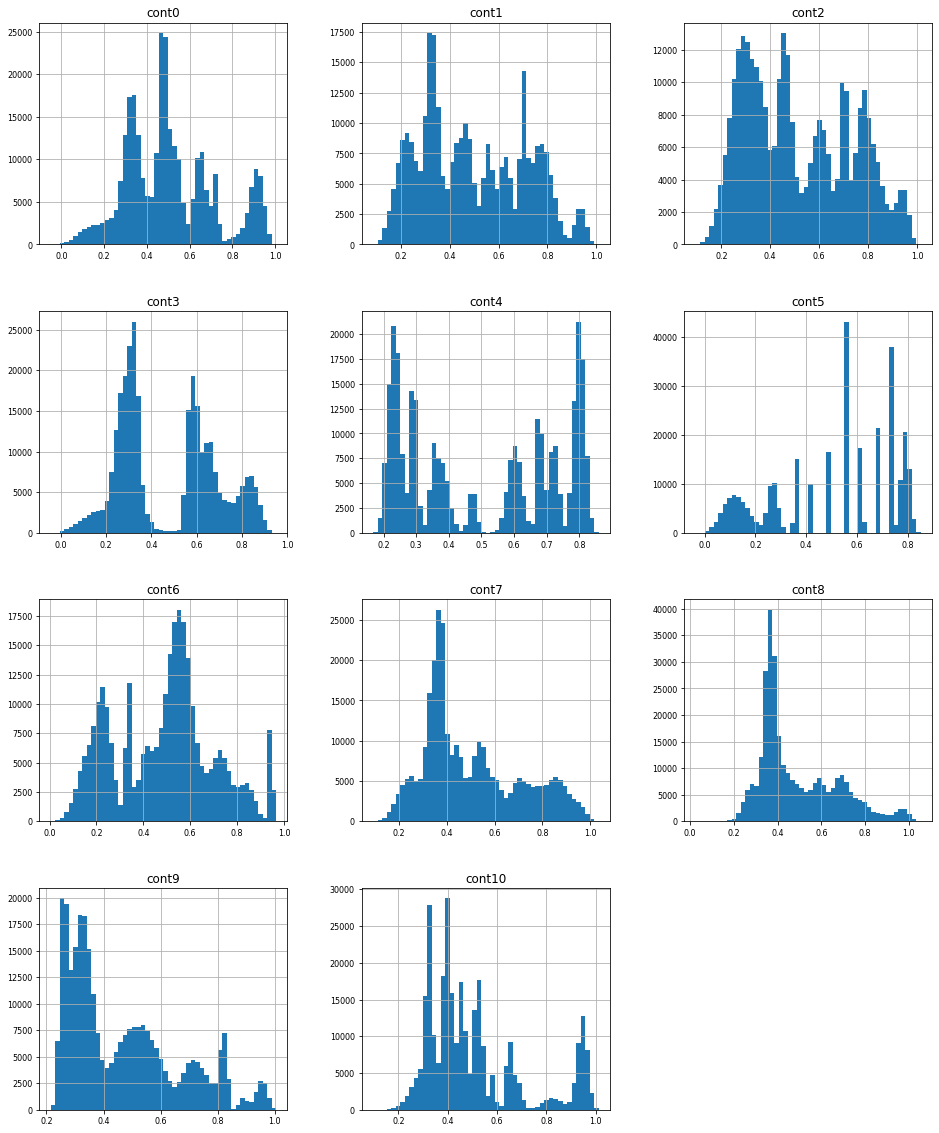

In [6]:
#A complete overview of the distribution of numerical training features
X_train_cont.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

The histograms above show a non-linear distribution for all continuous features. In assessing model fitting, any classifier that relies on linear decision surfaces (i.e. logistic regression classifiers) to get predictions needs to be examined further.

<AxesSubplot:>

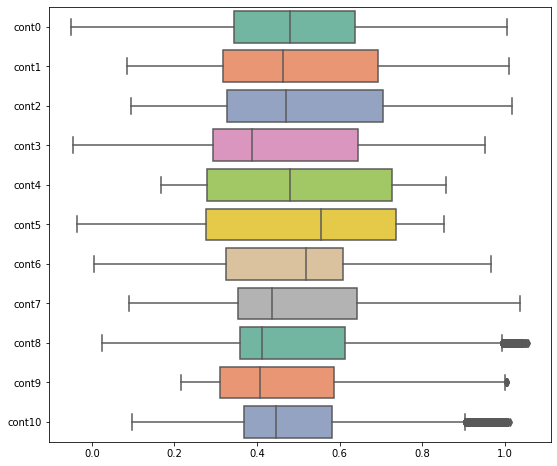

In [7]:
#Checking the incidence of extreme values (outliers)
plt.figure(figsize=(9, 8))
sns.boxplot(data=X_train_cont, orient="h", palette="Set2")

Summary statistics are used to produce boxplots which help clearly visualize the mean as well as all other relevant percentiles. Any assumption of normality can be ruled out by simply noticing the discrepancy between the mean and the 50th-percentile (median). Variables "cont8", "cont9" and "cont10" are more influenced by outliers than other continuous features. This issue might contribute to biased predictions and negatively affect final remarks.

In [8]:
#Examining correlation coefficients among numerical variables
X_train_cont.corr().round(3)

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
cont0,1.000,0.474,0.495,0.549,0.156,-0.169,-0.437,0.740,0.368,0.415,0.808
cont1,0.474,1.000,0.862,0.257,0.134,0.186,0.116,0.581,0.673,0.393,0.471
cont2,0.495,0.862,1.000,0.287,0.159,0.158,0.067,0.606,0.663,0.399,0.507
cont3,0.549,0.257,0.287,1.000,0.223,-0.069,-0.430,0.642,0.189,0.383,0.611
cont4,0.156,0.134,0.159,0.223,1.000,0.038,-0.081,0.232,0.065,0.161,0.208
cont5,-0.169,0.186,0.158,-0.069,0.038,1.000,0.439,-0.094,0.141,0.121,-0.161
cont6,-0.437,0.116,0.067,-0.430,-0.081,0.439,1.000,-0.362,0.123,-0.126,-0.443
cont7,0.740,0.581,0.606,0.642,0.232,-0.094,-0.362,1.000,0.479,0.443,0.775
cont8,0.368,0.673,0.663,0.189,0.065,0.141,0.123,0.479,1.000,0.293,0.382
cont9,0.415,0.393,0.399,0.383,0.161,0.121,-0.126,0.443,0.293,1.000,0.453


<AxesSubplot:>

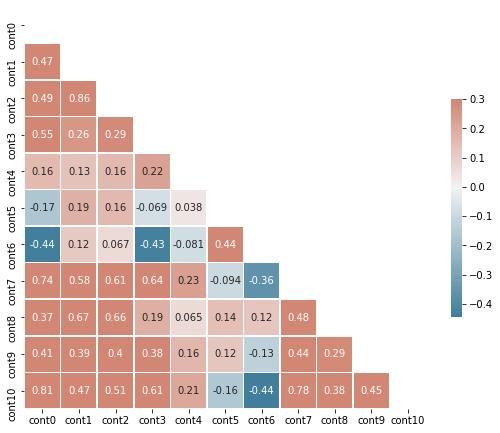

In [9]:
#Showing a lower triangular matrix of correlation coefficients
corr = X_train_cont.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(9, 8))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Our aim is forecasting potential multicollinearity that could arise in model fitting. In fact, it is highly probable to detect collinearity among two features as they are correlated. In this regard, correlation is significantly high (> 0.6) in the following eight mutual cases: cont0-cont7, cont1-cont2, cont1-cont7, cont2-cont7, cont2-cont8, cont3-cont7, cont3-cont10 and cont7-cont10. 

### EDA for categorical variables

In [10]:
#Selecting the relevant columns
X_train_cat= train_set[train_set.columns[1:20]]
X_train_cat.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B
1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B
2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B
3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B
4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B


We proceed below by exploring 18 categorical features included in the training dataset. 
Firstly, we display the number of levels ("unique") in each column and the "predominant" - notably the most frequent -  class together with its frequency to be compared with the total number of observations (300,000).

In [11]:
#Summary of categorical features displaying the number of levels ("unique") and the mostly present class in the column together with its frequency to be compared with the total number of observations in our training set (300,000)
print(X_train_cat.describe())

          cat0    cat1    cat2    cat3    cat4    cat5    cat6    cat7  \
count   300000  300000  300000  300000  300000  300000  300000  300000   
unique       2      15      19      13      20      84      16      51   
top          A       I       A       A       E      BI       A      AH   
freq    223525   90809  168694  187251  129385  238563  187896   45818   

          cat8    cat9   cat10   cat11   cat12   cat13   cat14   cat15  \
count   300000  300000  300000  300000  300000  300000  300000  300000   
unique      61      19     299       2       2       2       2       4   
top         BM       A      DJ       A       A       A       A       B   
freq     42380  201945   31584  258932  257139  292712  160166  203574   

         cat16   cat17   cat18  
count   300000  300000  300000  
unique       4       4       4  
top          D       D       B  
freq    206906  247125  255482  


Then, we inspect each categorical variable by counting the number of observations per level.

In [12]:
#Quantifying binary values of the response "target"
train_set['target'].value_counts()

0    220539
1     79461
Name: target, dtype: int64

As the response "target" in the training dataset is represented by 0's in 73.5% of cases, we display how categorical levels in each column contribute in terms of frequency to the final binary outcome.

In [13]:
X_train_cat['cat0'].value_counts()

A    223525
B     76475
Name: cat0, dtype: int64

<AxesSubplot:xlabel='cat0', ylabel='count'>

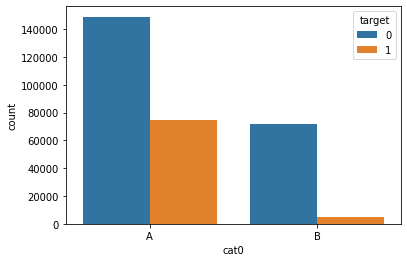

In [14]:
#Checking which categorical observation corresponds to which response (0,1)
sns.countplot(data = train_set, x="cat0", hue="target")

In "cat0" two-thirds of 0's derive from level "A", whereas the proportion increases as we deal with "target" 1.

In [15]:
X_train_cat['cat1'].value_counts()

I    90809
F    43818
K    41870
L    31891
H    17257
N    13231
M    11354
G    11248
A    10547
J    10036
O     8740
B     6847
C     1703
D      414
E      235
Name: cat1, dtype: int64

<AxesSubplot:xlabel='cat1', ylabel='count'>

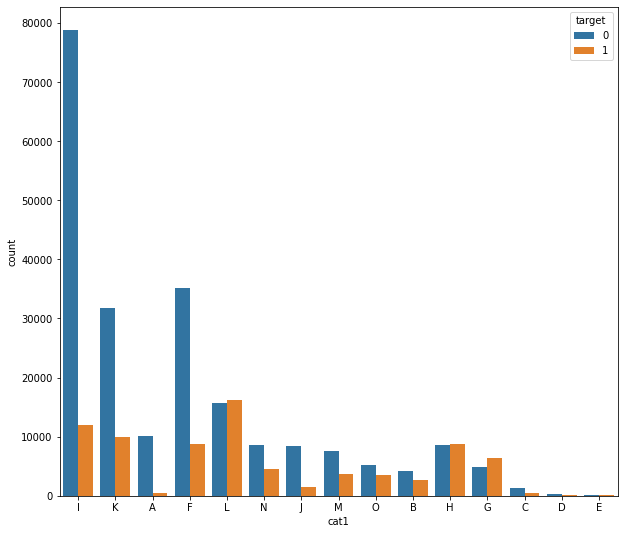

In [16]:
plt.figure(figsize = (10,9))
sns.countplot(data = train_set, x="cat1", hue="target")

"I", "K" and "F" categories in "cat1" show a clear predominance of 0's in the final training output. This might suggest a higher correlation between these and the "target". Curiously, in three cases the opposite trend is spotted ("L", "H", "G").

In [17]:
X_train_cat['cat2'].value_counts()

A    168694
C     38875
D     22720
G     18225
Q     10901
F      9877
J      9102
M      8068
I      5287
L      3997
O      2749
N       340
H       219
B       218
S       197
U       166
R       129
K       126
E       110
Name: cat2, dtype: int64

<AxesSubplot:xlabel='cat2', ylabel='count'>

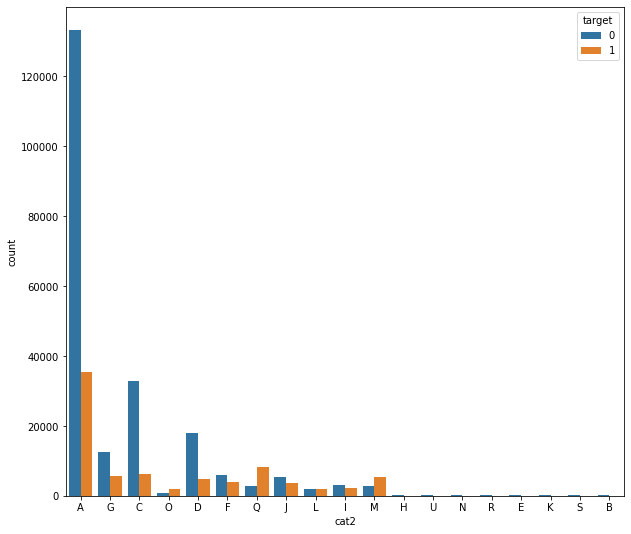

In [18]:
plt.figure(figsize = (10,9))
sns.countplot(data = train_set, x="cat2", hue="target")

Eight out of nineteen levels in "cat2" are less frequent than the remaining ones. Except for classes "O", "Q" and "M", a final 0-label prevails.

In [19]:
X_train_cat['cat3'].value_counts()

A    187251
B     79951
C     15957
D      8676
E      3318
F      2489
K       846
G       372
L       292
J       286
H       274
I       177
N       111
Name: cat3, dtype: int64

<AxesSubplot:xlabel='cat3', ylabel='count'>

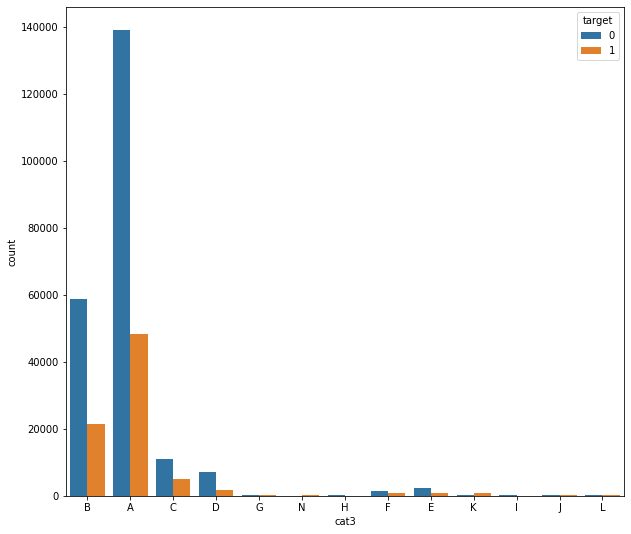

In [20]:
plt.figure(figsize = (10,9))
sns.countplot(data = train_set, x="cat3", hue="target")

As we consider the most present categorical values ("B", "A", "C", "D") in "cat3", them all largely promote to 0's in the "target".

In [21]:
X_train_cat['cat4'].value_counts()

E    129385
F     76678
G     30754
D     27919
H     23388
J      4307
I      3241
K      1481
M       547
C       506
O       330
B       301
S       285
T       215
L       214
Q       117
P       100
A        92
N        81
R        59
Name: cat4, dtype: int64

<AxesSubplot:xlabel='cat4', ylabel='count'>

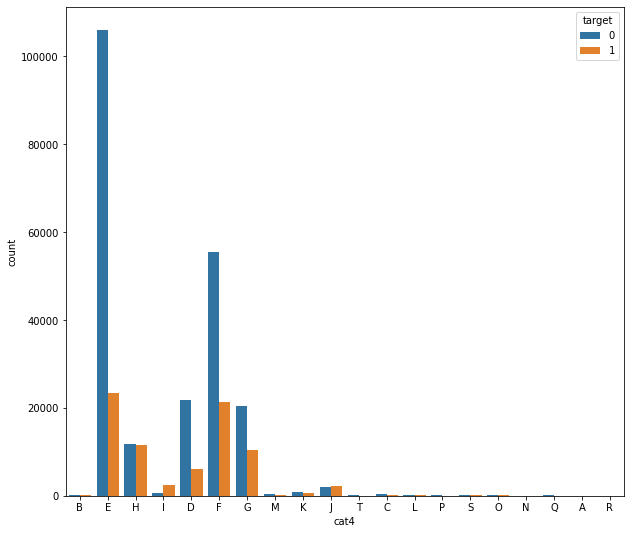

In [22]:
plt.figure(figsize = (10,9))
sns.countplot(data = train_set, x="cat4", hue="target")

In "cat4", only levels "I" and "J" contribute more to "target" 1.

In [23]:
X_train_cat['cat6'].value_counts()

A    187896
C     71427
E     16581
G     11198
I      6648
M      2182
K      1552
O       673
S       583
F       312
D       214
Y       212
B       172
U       155
Q       124
W        71
Name: cat6, dtype: int64

<AxesSubplot:xlabel='cat6', ylabel='count'>

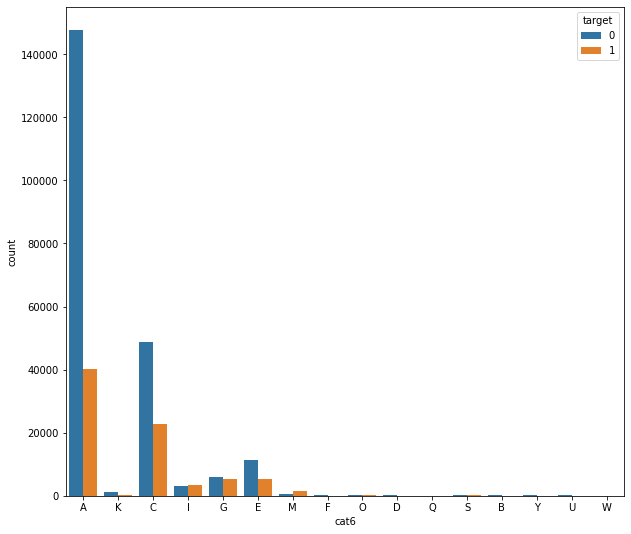

In [24]:
plt.figure(figsize = (10,9))
sns.countplot(data = train_set, x="cat6", hue="target")

Level "A" is by far the most present in "cat6" and corresponds to "target" 1 only in around 21% of its values.

In [25]:
X_train_cat['cat9'].value_counts()

A    201945
E     33046
C     23360
F     14371
J      8982
I      7931
N      4785
L      2957
R       862
V       360
B       280
G       214
Q       211
D       189
W       125
O       122
U       101
X        99
S        60
Name: cat9, dtype: int64

<AxesSubplot:xlabel='cat9', ylabel='count'>

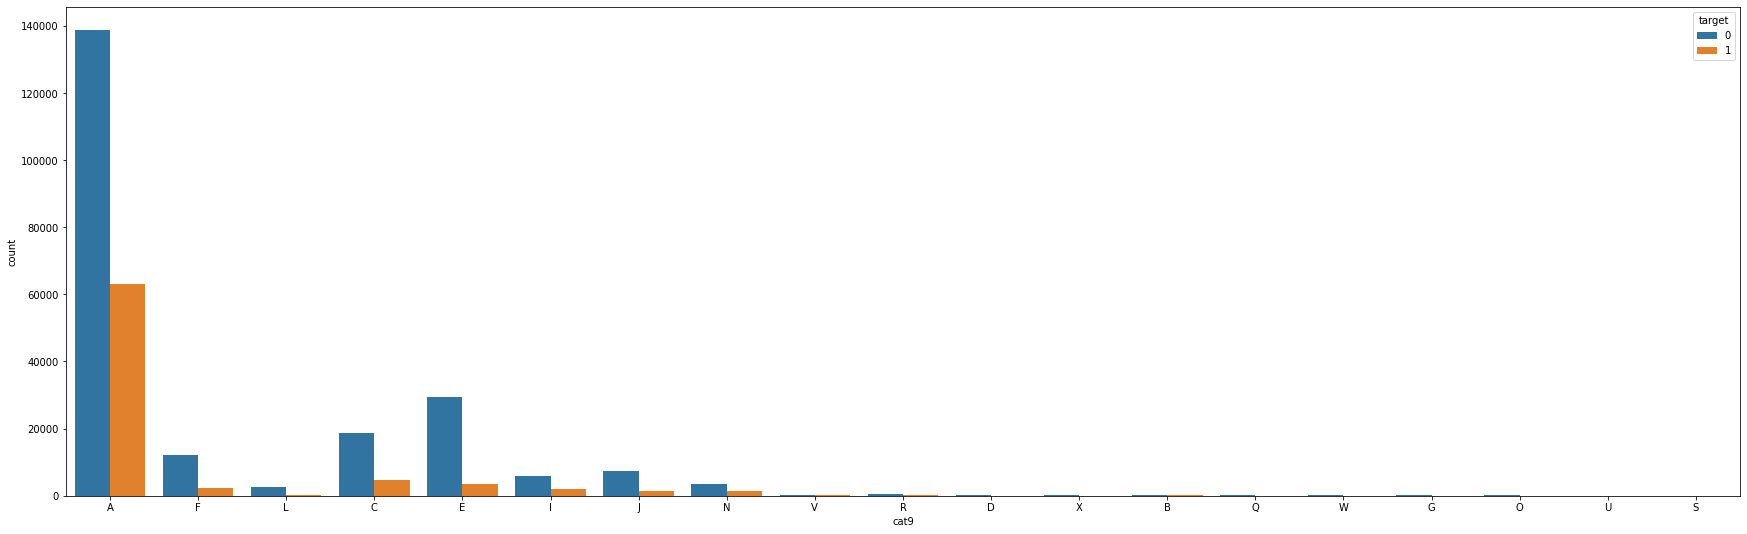

In [26]:
plt.figure(figsize = (30,9))
sns.countplot(data = train_set, x="cat9", hue="target")

As we consider "cat9", observations largely belong to class "A", which counts six times the values matching the second most frequent level ("E").

In [27]:
X_train_cat['cat11'].value_counts()

A    258932
B     41068
Name: cat11, dtype: int64

<AxesSubplot:xlabel='cat11', ylabel='count'>

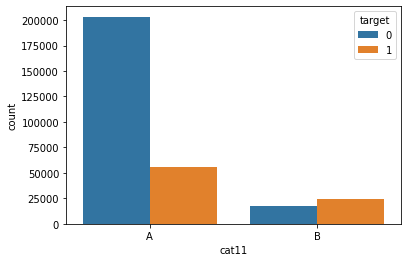

In [28]:
sns.countplot(data = train_set, x="cat11", hue="target")

Level "A" dominates most of observations of "cat11" feature. However, compared to the second level "B", many more values correspond to 0-label in the "target".

In [29]:
X_train_cat['cat12'].value_counts()

A    257139
B     42861
Name: cat12, dtype: int64

<AxesSubplot:xlabel='cat12', ylabel='count'>

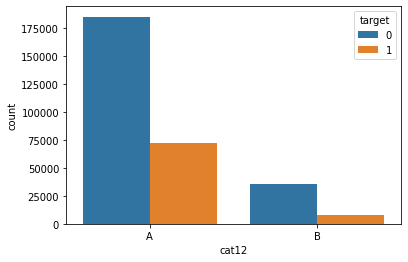

In [30]:
sns.countplot(data = train_set, x="cat12", hue="target")

Although "B" accounts for only 14.3% of total observed values in "cat12", the proportion of contribution to "target" from both categories respectively is quite similar around 72% (0) vs 28% (1).

In [31]:
X_train_cat['cat13'].value_counts()

A    292712
B      7288
Name: cat13, dtype: int64

<AxesSubplot:xlabel='cat13', ylabel='count'>

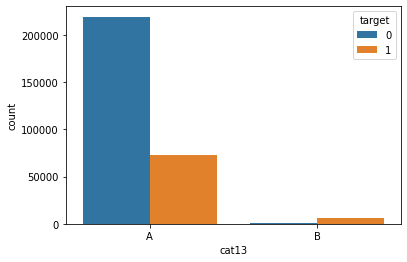

In [32]:
sns.countplot(data = train_set, x="cat13", hue="target")

Like in "cat11", class "A" is recorded across the majority of observations of column vector "cat13". As a consequence, this feature contributes to the preponderance of 0's in the training "target".

In [33]:
X_train_cat['cat14'].value_counts()

A    160166
B    139834
Name: cat14, dtype: int64

<AxesSubplot:xlabel='cat14', ylabel='count'>

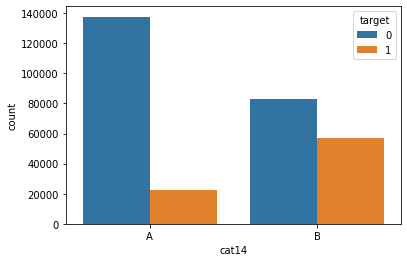

In [34]:
sns.countplot(data = train_set, x="cat14", hue="target")

"cat14" only includes two levels, "A" and "B", which both see "target" equal to 0 overcoming the 1's.

In [35]:
X_train_cat['cat15'].value_counts()

B    203574
D     83188
A     11072
C      2166
Name: cat15, dtype: int64

<AxesSubplot:xlabel='cat15', ylabel='count'>

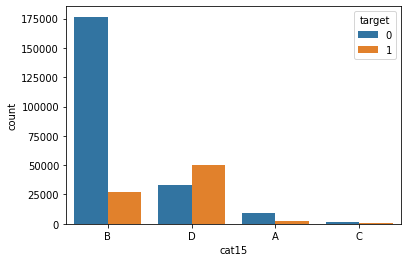

In [36]:
sns.countplot(data = train_set, x="cat15", hue="target")

Histogram for "cat15" shows classes "A" and "C" as the least frequent values, while the dominant "B" with over 200,000 observations leads to a "target" 0 in 86% of cases.

In [37]:
X_train_cat['cat16'].value_counts()

D    206906
B     84541
C      5369
A      3184
Name: cat16, dtype: int64

<AxesSubplot:xlabel='cat16', ylabel='count'>

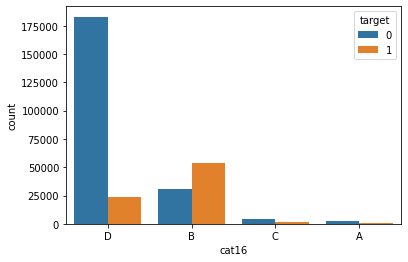

In [38]:
sns.countplot(data = train_set, x="cat16", hue="target")

Level "D" is the most frequent and it mainly results into a "target" 0. On the other hand, for "B" in "cat16", "target" 1 prevails in the training set.

In [39]:
X_train_cat['cat17'].value_counts()

D    247125
B     26136
C     25325
A      1414
Name: cat17, dtype: int64

<AxesSubplot:xlabel='cat17', ylabel='count'>

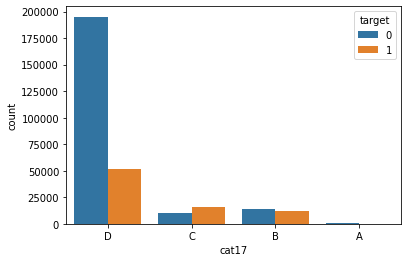

In [40]:
sns.countplot(data = train_set, x="cat17", hue="target")

In "cat17", class "A" is underrepresented, while the dominant "B" with a total of around 250,000 observations leads to a "target" 0 in around 80% of its values. The probability of getting "target" equal to 1 outweights the one for a 0-"target" if the subject sampled displays level "C".

In [41]:
X_train_cat['cat18'].value_counts()

B    255482
D     22394
C     21414
A       710
Name: cat18, dtype: int64

<AxesSubplot:xlabel='cat18', ylabel='count'>

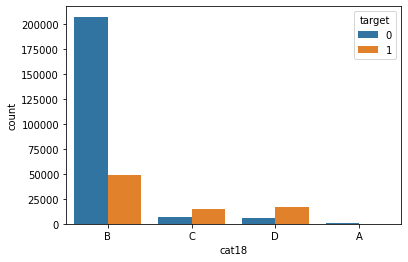

In [42]:
sns.countplot(data = train_set, x="cat18", hue="target")

Among the four classes in "cat18", level "B" undoubtedly dominates in counts and mostly generate a 0-"target". Contrarily, if a client shows "C" or "D", it will more probably result into a 1-"target".

Histograms for "cat5", "cat7", "cat8", "cat10" are not included because they account for an extremely high number of categories. 

In [43]:
X_train_cat['cat5'].value_counts()

BI    238563
AB     41639
BU      6740
K       2713
G        683
       ...  
ZZ        25
B         24
AG        19
BP        19
CB        18
Name: cat5, Length: 84, dtype: int64

In [44]:
X_train_cat['cat7'].value_counts()

AH    45818
E     39601
AS    25326
J     16135
AN    16097
U     15674
N     14983
AF    11455
AK     9697
AV     7958
S      7921
AI     7668
A      6432
K      6264
Y      5896
G      5656
F      5550
AW     5322
C      4324
AA     3692
R      2991
AX     2635
O      2538
AP     2311
AD     1826
V      1798
AY     1749
AO     1734
AG     1706
H      1692
AL     1572
W      1525
B      1408
Q      1306
AM     1183
AR     1121
L       941
AT      918
M       907
D       835
BA      781
AU      671
X       662
AC      660
I       640
P       611
AB      539
AE      458
T       379
AJ      229
AQ      205
Name: cat7, dtype: int64

In [45]:
X_train_cat['cat8'].value_counts()

BM    42380
AE    24442
AX    22129
Y     20864
H     15561
      ...  
AQ       69
T        67
B        57
AC       57
AR       33
Name: cat8, Length: 61, dtype: int64

In [46]:
X_train_cat['cat10'].value_counts()

DJ    31584
HK    30998
DP    23679
GS    16619
CR    14382
      ...  
GH        1
ML        1
GG        1
MW        1
BA        1
Name: cat10, Length: 299, dtype: int64

To sum up, many classes are rather disproportionate as we compare their densities. This might lead to overfitting as the final training dataset becomes extremely large after converting categorical inputs into binary ones through One-Hot Encoding. 